In [1]:
!pip install tensorflow opencv-python-headless pytesseract
!apt-get install -y tesseract-ocr



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,609 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123589 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

Saving WhatsApp Image 2024-07-10 at 12.11.51 PM.jpeg to WhatsApp Image 2024-07-10 at 12.11.51 PM.jpeg


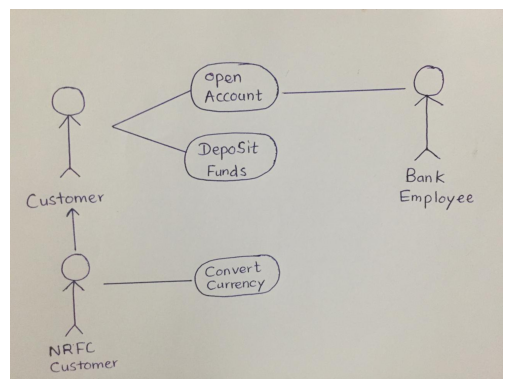

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

image_path = list(uploaded.keys())[0] # Use the uploaded image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# Resize and normalize the image
image_resized = cv2.resize(image_rgb, (224, 224))
image_normalized = image_resized / 255.0

gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)

if image is None:
    raise ValueError("Image not loaded properly.")


In [ ]:
from tensorflow.keras.applications import VGG16

# Load pretrained model
model = VGG16(weights='imagenet', include_top=False)

# Extract features
features = model.predict(np.expand_dims(image_normalized, axis=0))
print("Extracted Features Shape:", features.shape)


1/1 [==============================] - 1s 1s/step
Extracted Features Shape: (1, 7, 7, 512)


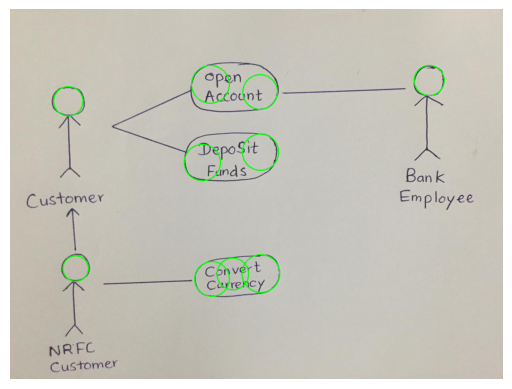

Actors: ['aa', '', 'vs', 'a', 'a.', '', 'ere', 'cae', 'aes ie', '—————']


In [8]:
import pytesseract
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect circles for stickman heads with stricter conditions
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50, param1=100, param2=30, minRadius=20, maxRadius=50)

actors = []
actor_names = []

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        # Add filtering condition for stickman heads
        if r > 15 and y > 50:  # Assume heads are larger than 15 pixels and not too close to the top edge
            actors.append((x, y, r))
            cv2.circle(image_rgb, (x, y), r, (0, 255, 0), 2)
            # Define the region below the circle to extract actor name
            roi = gray[y+r+5:y+3*r, x-r:x+r]  # Adjust region to avoid text within the circle
            actor_name = pytesseract.image_to_string(roi, config='--psm 7')  # Use a suitable PSM mode
            actor_names.append(actor_name.strip())

# Display detected circles
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# Print actor names
print("Actors:", actor_names)



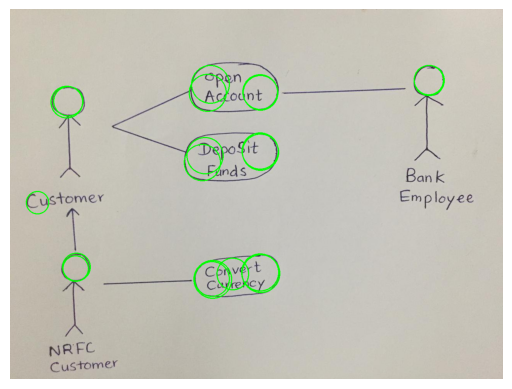

In [10]:
# Apply GaussianBlur to reduce noise and improve circle detection
gray_blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Detect circles for stickman heads with stricter conditions
circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50, param1=100, param2=30, minRadius=20, maxRadius=50)

heads = []
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        if r > 15 and y > 50:  # Filter condition for stickman heads
            heads.append((x, y, r))
            cv2.circle(image_rgb, (x, y), r, (0, 255, 0), 2)

# Display detected circles
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


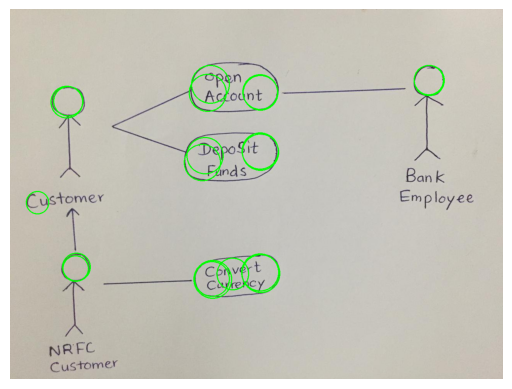

Actors: ['<a', '', '', 'a', 'she', 'a', '', '', '——', '']


In [11]:
ray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve circle detection
gray_blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Detect circles for stickman heads with stricter conditions
circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50, param1=100, param2=30, minRadius=20, maxRadius=50)

actors = []
actor_names = []

if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        # Add filtering condition for stickman heads
        if r > 15 and y > 50:  # Assume heads are larger than 15 pixels and not too close to the top edge
            actors.append((x, y, r))
            cv2.circle(image_rgb, (x, y), r, (0, 255, 0), 2)
            # Define the region below the circle to extract actor name
            roi = gray[y+r+10:y+3*r, x-r:x+r]  # Adjust region to avoid text within the circle
            actor_name = pytesseract.image_to_string(roi, config='--psm 7')  # Use a suitable PSM mode
            actor_names.append(actor_name.strip())

# Display detected circles
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# Print actor names
print("Actors:", actor_names)

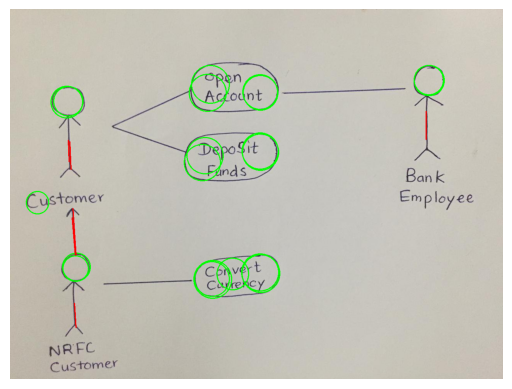

In [12]:
# Detect edges using Canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Detect lines using Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

bodies = []
if lines is not None:
    for line in lines:
        for x1, y1, x2, y2 in line:
            # Consider only vertical lines
            if abs(x1 - x2) < 10 and abs(y1 - y2) > 20:
                bodies.append(((x1, y1), (x2, y2)))
                cv2.line(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display detected circles
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


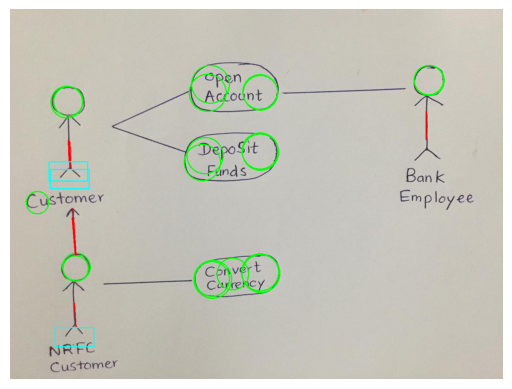

Actors: ['Bae', 'vs', 'y']


In [13]:
actors = []
actor_names = []

for (x, y, r) in heads:
    for ((x1, y1), (x2, y2)) in bodies:
        # Check if the vertical line is directly below the circle
        if x1 >= x - r and x1 <= x + r and y1 >= y + r and y1 <= y + 3 * r:
            actors.append((x, y, r, x1, y1, x2, y2))
            # Define the region below the circle to extract actor name
            roi = gray[y2:y2 + 50, x1 - 50:x1 + 50]  # Adjust region to avoid text within the circle
            actor_name = pytesseract.image_to_string(roi, config='--psm 7')  # Use a suitable PSM mode
            actor_names.append(actor_name.strip())
            cv2.rectangle(image_rgb, (x1 - 50, y2), (x1 + 50, y2 + 50), (0, 255, 255), 2)

# Display detected circles and lines
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# Print actor names
print("Actors:", actor_names)


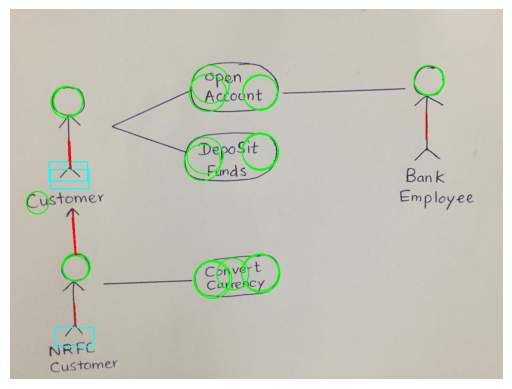

In [ ]:
# Detect edges using Canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Detect lines using Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

bodies = []
if lines is not None:
    for line in lines:
        for x1, y1, x2, y2 in line:
            # Consider only vertical lines
            if abs(x1 - x2) < 10 and abs(y1 - y2) > 20:
                bodies.append(((x1, y1), (x2, y2)))
                cv2.line(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display detected circles
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


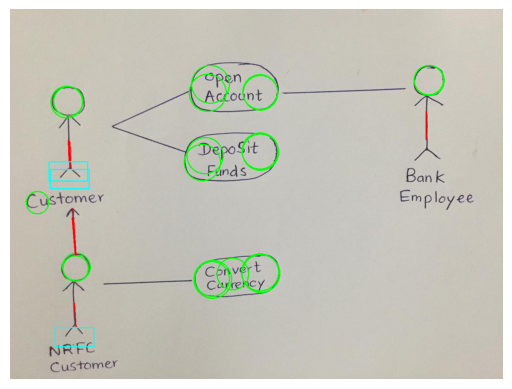

Actors: ['Bae', 'vs', 'y']


In [ ]:
actors = []
actor_names = []

for (x, y, r) in heads:
    for ((x1, y1), (x2, y2)) in bodies:
        # Check if the vertical line is directly below the circle
        if x1 >= x - r and x1 <= x + r and y1 >= y + r and y1 <= y + 3 * r:
            actors.append((x, y, r, x1, y1, x2, y2))
            # Define the region below the circle to extract actor name
            roi = gray[y2:y2 + 50, x1 - 50:x1 + 50]  # Adjust region to avoid text within the circle
            actor_name = pytesseract.image_to_string(roi, config='--psm 7')  # Use a suitable PSM mode
            actor_names.append(actor_name.strip())
            cv2.rectangle(image_rgb, (x1 - 50, y2), (x1 + 50, y2 + 50), (0, 255, 255), 2)

# Display detected circles and lines
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# Print actor names
print("Actors:", actor_names)

In [ ]:
# Detect edges using Canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Detect lines using Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

bodies = []
if lines is not None:
    for line in lines:
        for x1, y1, x2, y2 in line:
            # Consider only vertical lines
            if abs(x1 - x2) < 10 and abs(y1 - y2) > 20:
                bodies.append(((x1, y1), (x2, y2)))
                cv2.line(image_rgb, (x1, y1), (x2, y2), (255, 0, 0), 2)


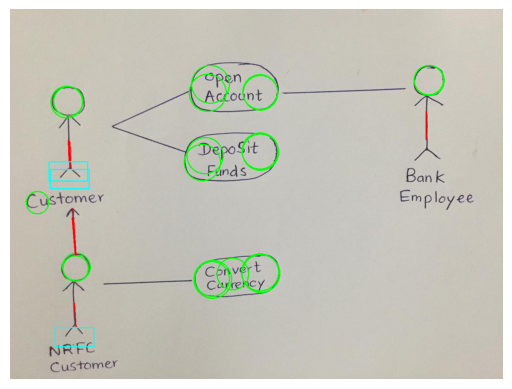

Actors: ['Bae', 'vs', 'y']


In [ ]:
actors = []
actor_names = []

for (x, y, r) in heads:
    for ((x1, y1), (x2, y2)) in bodies:
        # Check if the vertical line is directly below the circle
        if x1 >= x - r and x1 <= x + r and y1 >= y + r and y1 <= y + 3 * r:
            actors.append((x, y, r, x1, y1, x2, y2))
            # Define the region below the circle to extract actor name
            roi = gray[y2:y2 + 50, x1 - 50:x1 + 50]  # Adjust region to avoid text within the circle
            actor_name = pytesseract.image_to_string(roi, config='--psm 7')  # Use a suitable PSM mode
            actor_names.append(actor_name.strip())
            cv2.rectangle(image_rgb, (x1 - 50, y2), (x1 + 50, y2 + 50), (0, 255, 255), 2)

# Display detected circles and lines
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# Print actor names
print("Actors:", actor_names)


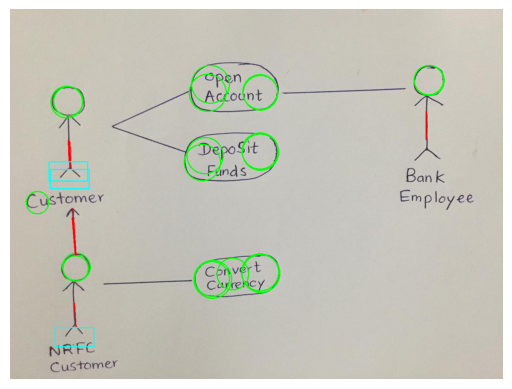

Actors: ['Bae', 'vs', 'y']


In [ ]:
actors = []
actor_names = []

for (x, y, r) in heads:
    for ((x1, y1), (x2, y2)) in bodies:
        # Check if the vertical line is directly below the circle
        if x1 >= x - r and x1 <= x + r and y1 >= y + r and y1 <= y + 3 * r:
            actors.append((x, y, r, x1, y1, x2, y2))
            # Define the region below the circle to extract actor name
            roi = gray[y2:y2 + 50, x1 - 50:x1 + 50]  # Adjust region to avoid text within the circle
            actor_name = pytesseract.image_to_string(roi, config='--psm 7')  # Use a suitable PSM mode
            actor_names.append(actor_name.strip())
            cv2.rectangle(image_rgb, (x1 - 50, y2), (x1 + 50, y2 + 50), (0, 255, 255), 2)

# Display detected circles and lines
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# Print actor names
print("Actors:", actor_names)


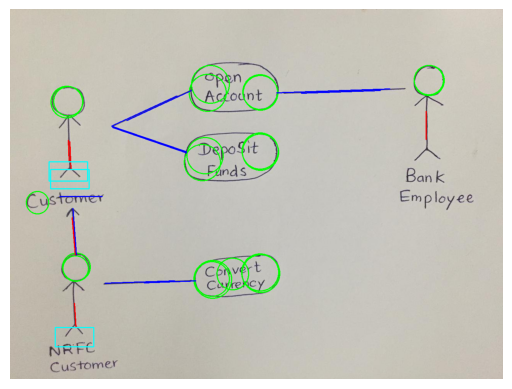

In [ ]:
# Detect lines
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)

connections = []
if lines is not None:
    for line in lines:
        for x1, y1, x2, y2 in line:
            connections.append(((x1, y1), (x2, y2)))
            cv2.line(image_rgb, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display detected lines
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


In [1]:
!pip install google-cloud-vision pillow

import os
import xml.etree.ElementTree as ET
from google.cloud import vision
from PIL import Image
from google.colab import drive, files
import re

# Mount Google Drive
drive.mount('/content/drive')

# Set the GOOGLE_APPLICATION_CREDENTIALS environment variable to the path in your Google Drive
credentials_path = '/content/drive/My Drive/Colab Notebooks/FYP/final-year-project-428305-b016400d8e0f.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credentials_path

# Initialize Google Cloud Vision API client
client = vision.ImageAnnotatorClient()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
def parse_xml_annotation(xml_file):
    if not os.path.exists(xml_file):
        raise FileNotFoundError(f"The file {xml_file} does not exist.")

    try:
        tree = ET.parse(xml_file)
    except ET.ParseError as e:
        raise ValueError(f"Failed to parse XML file {xml_file}: {e}")

    root = tree.getroot()
    annotations = []

    for obj in root.findall('object'):
        class_name = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)

        annotations.append({
            'class': class_name,
            'bbox': [xmin, ymin, xmax, ymax]
        })

    return annotations

def categorize_annotations(annotations):
    actors = []
    usecases = []
    includes = []
    extends = []
    associations = []

    for annotation in annotations:
        if annotation['class'] == 'actor':
            actors.append(annotation)
        elif annotation['class'] == 'usecase':
            usecases.append(annotation)
        elif annotation['class'] == 'include':
            includes.append(annotation)
        elif annotation['class'] == 'extend':
            extends.append(annotation)
        elif annotation['class'] == 'association':
            associations.append(annotation)

    return actors, usecases, includes, extends, associations

def extract_text_from_image(image_path, bbox):
    image = Image.open(image_path)
    cropped_image = image.crop(bbox)

    # Convert image to RGB if it has an alpha channel
    if cropped_image.mode == 'RGBA':
        cropped_image = cropped_image.convert('RGB')

    # Save the cropped image temporarily
    temp_image_path = "/tmp/temp_image.jpg"
    cropped_image.save(temp_image_path)

    # Read the image file into memory
    with open(temp_image_path, "rb") as image_file:
        content = image_file.read()

    # Use Google Cloud Vision API to detect text
    image = vision.Image(content=content)
    response = client.text_detection(image=image)
    texts = response.text_annotations

    if texts:
        text = texts[0].description.strip()
        # Keep only English letters, numbers, and common punctuation
        text = re.sub(r'[^A-Za-z0-9\s.,-]+', '', text)
        return text
    return ""

def display_information(actors, usecases, includes, extends, associations, image_path):
    actor_descriptions = []
    usecase_descriptions = []
    include_descriptions = []
    extend_descriptions = []
    association_descriptions = []

    for actor in actors:
        actor_text = extract_text_from_image(image_path, actor['bbox'])
        actor_descriptions.append(actor_text)

    for usecase in usecases:
        usecase_text = extract_text_from_image(image_path, usecase['bbox'])
        usecase_descriptions.append(usecase_text)

    for include in includes:
        include_text = extract_text_from_image(image_path, include['bbox'])
        include_descriptions.append(include_text)

    for extend in extends:
        extend_text = extract_text_from_image(image_path, extend['bbox'])
        extend_descriptions.append(extend_text)

    for association in associations:
        association_text = extract_text_from_image(image_path, association['bbox'])
        association_descriptions.append(association_text)

    print("Actors:")
    for actor_text in actor_descriptions:
        print(f" - {actor_text}")

    print("\nUse Cases:")
    for usecase_text in usecase_descriptions:
        print(f" - {usecase_text}")

    return actor_descriptions, usecase_descriptions, include_descriptions, extend_descriptions, association_descriptions

def find_closest_pairs(includes, extends, associations, actors, usecases, image_path):
    closest_pairs = []

    for include in includes:
        closest_pair = find_two_closest(include, actors + usecases, image_path)
        closest_pairs.append(('include', closest_pair))

    for extend in extends:
        closest_pair = find_two_closest(extend, actors + usecases, image_path)
        closest_pairs.append(('extend', closest_pair))

    for association in associations:
        closest_pair = find_two_closest(association, actors + usecases, image_path)
        closest_pairs.append(('association', closest_pair))

    print("\nClosest Relationships:")
    for rel_type, pair in closest_pairs:
        if pair:
            print(f"\n{rel_type.capitalize()}:")
            print(f" - {pair[0]} <-> {pair[1]}")

    return closest_pairs

def find_two_closest(relationship, group, image_path):
    relationship_center = get_center(relationship['bbox'])
    closest_elements = []
    min_distances = []

    for item in group:
        item_center = get_center(item['bbox'])
        distance = calculate_distance(relationship_center, item_center)
        if len(closest_elements) < 2:
            closest_elements.append(item)
            min_distances.append(distance)
        else:
            max_distance_index = min_distances.index(max(min_distances))
            if distance < min_distances[max_distance_index]:
                closest_elements[max_distance_index] = item
                min_distances[max_distance_index] = distance

    if len(closest_elements) == 2:
        text1 = extract_text_from_image(image_path, closest_elements[0]['bbox'])
        text2 = extract_text_from_image(image_path, closest_elements[1]['bbox'])
        return (text1, text2)
    return None

def get_center(bbox):
    x1, y1, x2, y2 = bbox
    return ((x1 + x2) / 2, (y1 + y2) / 2)

def calculate_distance(point1, point2):
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5

# Upload XML and Image files
uploaded = files.upload()
xml_file = list(uploaded.keys())[0]

uploaded = files.upload()
image_file = list(uploaded.keys())[0]

# Debugging: Print current working directory and check file existence
print("Current working directory:", os.getcwd())
print("Trying to access file:", xml_file)
print("File exists:", os.path.exists(xml_file))

annotations = parse_xml_annotation(xml_file)
actors, usecases, includes, extends, associations = categorize_annotations(annotations)

actor_descriptions, usecase_descriptions, include_descriptions, extend_descriptions, association_descriptions = display_information(actors, usecases, includes, extends, associations, image_file)
closest_pairs = find_closest_pairs(includes, extends, associations, actors, usecases, image_file)


Saving download (7).xml to download (7).xml


Saving download (7).png to download (7).png
Current working directory: /content
Trying to access file: download (7).xml
File exists: True
Actors:
 - Customer
 - NRFC
Customer
 - Bank
Employee

Use Cases:
 - open
account
 - Deposit
Fund
 - Convert
Currency

Closest Relationships:

Association:
 - Customer <-> open
account

Association:
 - Convert
Currency <-> NRFC
Customer

Association:
 - Customer <-> Deposit
Fund

Association:
 - open
account <-> Bank
Employee
